 # Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import cPickle
sns.set(style='white',palette='muted',color_codes=True)
sns.set_style("whitegrid")
%matplotlib inline

/Users/honda/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
/Users/honda/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Unpickle data

In [2]:
#Functiion for unpickle the data.
def unpickle(f):
    fo = open(f,'rb')
    d = cPickle.load(fo)
    fo.close()
    return d

# Load CIFAR-10 dataset

In [3]:
def load_cifar10(dir):
    train_data=[]
    train_target=[]
    
    for i in range(1,6):
        d = unpickle('%s/data_batch_%d' %(dir,i))
        train_data.extend(d['data'])
        train_target.extend(d['labels'])
        
    d = unpickle('%s/test_batch' %(dir))
    test_data = d['data']
    test_target = d['labels']
    
    train_data = np.array(train_data,dtype=np.float32)
    train_target = np.array(train_target,dtype=np.int32)
    test_data = np.array(test_data,dtype=np.float32)
    test_target = np.array(test_target,dtype=np.int32)
    
    train_data /=255.0
    test_data /=255.0
    
    return train_data,test_data,train_target,test_target

In [4]:
X_train,X_test,y_train,y_test = load_cifar10("cifar-10-batches-py")

In [5]:
X_train = X_train.reshape((len(X_train),3,32,32))
X_test = X_test.reshape((len(X_test),3,32,32))

(0, 6000)

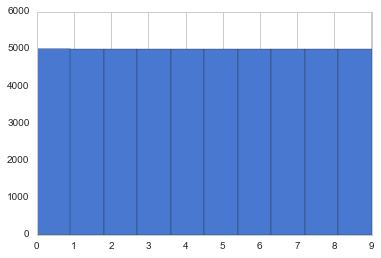

In [6]:
plt.hist(y_train)
plt.xlim(0,9)
plt.ylim(0,6000)

/Users/honda/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/honda/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


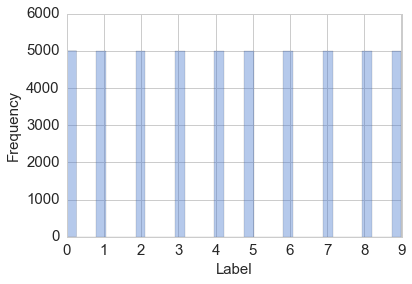

In [7]:
sns.distplot(y_train,kde=False,rug=False,color='b')
plt.ylim(0,6000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title('Distribution of Training Data',fontsize=15)

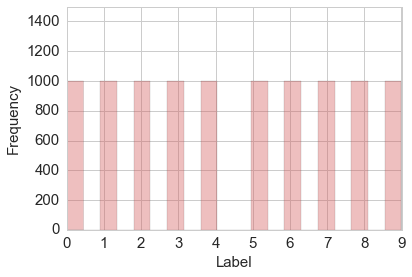

In [8]:
sns.distplot(y_test,kde=False,rug=False,color='r')
plt.ylim(0,1500)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Label',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.title("Distribution of Test Data",fontsize=15)

In [9]:
from keras.utils import np_utils
nb_classes =10

#Change the target values into one-hot vectors 
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.


In [10]:
y_test
#y_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

# Import Deep Learning Library

In [11]:
from keras.models import Sequential
from keras.layers import Dense,Activation,MaxPooling2D,Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils
from keras.optimizers import SGD,Adam
from keras import backend as K
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot, plot

# Model 1(1 Convolution layer and 2 Fully Connected layers)

In [12]:
batch_size = 32
nb_classes = 10
nb_epoch = 20
nb_filters=32
model = Sequential()
model.add(Convolution2D(nb_filters,3,3,border_mode='same',input_shape=(3,32,32)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model.add(Dense(output_dim=nb_classes,input_dim=512))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



In [13]:
res = model.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 95s - loss: 1.4619 - acc: 0.4775 - val_loss: 1.2305 - val_acc: 0.5572
Epoch 2/20
50000/50000 [==============================] - 95s - loss: 1.1170 - acc: 0.6062 - val_loss: 1.0650 - val_acc: 0.6281
Epoch 3/20
50000/50000 [==============================] - 95s - loss: 0.9253 - acc: 0.6735 - val_loss: 1.1298 - val_acc: 0.6021
Epoch 4/20
50000/50000 [==============================] - 95s - loss: 0.7498 - acc: 0.7370 - val_loss: 1.0474 - val_acc: 0.6420
Epoch 5/20
50000/50000 [==============================] - 94s - loss: 0.5863 - acc: 0.7949 - val_loss: 1.1067 - val_acc: 0.6545
Epoch 6/20
50000/50000 [==============================] - 94s - loss: 0.4272 - acc: 0.8526 - val_loss: 1.1732 - val_acc: 0.6518
Epoch 7/20
50000/50000 [==============================] - 95s - loss: 0.2856 - acc: 0.9029 - val_loss: 1.2828 - val_acc: 0.6526
Epoch 8/20
50000/50000 [==============================

In [14]:
res.history['acc']

[0.47749999999999998,
 0.60618000000000005,
 0.67349999999999999,
 0.73699999999999999,
 0.79488000000000003,
 0.85255999999999998,
 0.90293999999999996,
 0.93464000000000003,
 0.95430000000000004,
 0.96919999999999995,
 0.97540000000000004,
 0.97809999999999997,
 0.98606000000000005,
 0.98640000000000005,
 0.99109999999999998,
 0.99468000000000001,
 0.99626000000000003,
 0.99878,
 0.99975999999999998,
 0.99982000000000004]

In [15]:
res.history['val_acc']

[0.55720000000000003,
 0.62809999999999999,
 0.60209999999999997,
 0.64200000000000002,
 0.65449999999999997,
 0.65180000000000005,
 0.65259999999999996,
 0.6593,
 0.65449999999999997,
 0.65639999999999998,
 0.66539999999999999,
 0.66049999999999998,
 0.66049999999999998,
 0.66069999999999995,
 0.66849999999999998,
 0.66949999999999998,
 0.67689999999999995,
 0.6794,
 0.68179999999999996,
 0.68479999999999996]

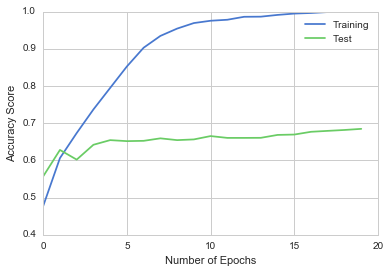

In [16]:
x=range(nb_epoch)
plt.plot(x,res.history['acc'],label='Training')
plt.plot(x,res.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


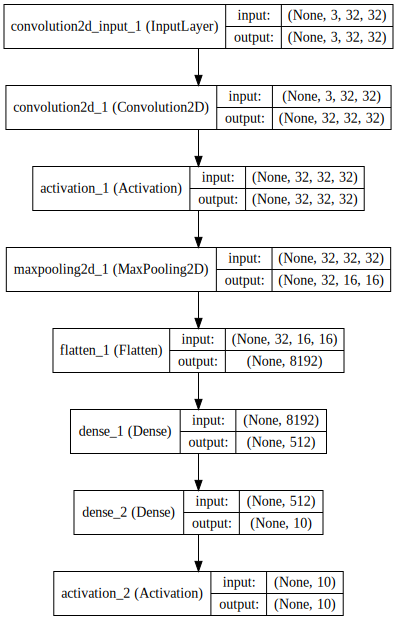

In [17]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# Model 2 3 Convolutional layers & 2 Fully connected layers

In [ ]:
model2 = Sequential()
model2.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Convolution2D(32,3,3,border_mode='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

#model2.add(Convolution2D(32,3,3,border_mode='same'))
#model2.add(Activation('relu'))
#model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model2.add(Dense(output_dim=10,input_dim=512))
model2.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])



In [ ]:
res2 = model2.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
15584/50000 [========>.....................] - ETA: 64s - loss: 1.7781 - acc: 0.3391

In [ ]:
x=range(nb_epoch)
plt.plot(x,res2.history['acc'],label='Training')
plt.plot(x,res2.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


# Model 3 3 Convolutional layers & 2 Fully connected layers

In [ ]:
model3 = Sequential()
model3.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(32,3,3,border_mode='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Convolution2D(32,3,3,border_mode='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model3.add(Dense(output_dim=10,input_dim=512))
model3.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])



In [ ]:
res3 = model3.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

In [ ]:
x=range(nb_epoch)
plt.plot(x,res3.history['acc'],label='Training')
plt.plot(x,res3.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')


In [ ]:
from keras.utils.visualize_util import plot
plot(model, to_file='model.png')

In [ ]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Model 4 (4 Convolutional layers and 2 Fully connected layers)

In [ ]:
model4 = Sequential()
model4.add(Convolution2D(32,3,3,border_mode='same',input_shape=(3,32,32)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Convolution2D(32,3,3,border_mode='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Convolution2D(32,3,3,border_mode='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Convolution2D(32,3,3,border_mode='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))

#model4.add(Convolution2D(32,3,3,border_mode='same'))
#model4.add(Activation('relu'))
#model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())
model4.add(Dense(output_dim=512,input_dim=7200,activation='relu'))
model4.add(Dense(output_dim=10,input_dim=512))
model4.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])



In [ ]:
res4 = model4.fit(X_train,y_train,
              batch_size=batch_size,
              nb_epoch=nb_epoch,
              validation_data=(X_test, y_test),
              shuffle=True)

In [ ]:
SVG(model_to_dot(model4).create(prog='dot', format='svg'))

In [ ]:
x=range(nb_epoch)
plt.plot(x,res4.history['acc'],label='Training')
plt.plot(x,res4.history['val_acc'],label='Test')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
